# Sentiment Twitter Posts(NLP)


In [2]:
pip install wordcloud



   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 871.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 819.2 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 654.9 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 612.6 kB/s eta 0:00:01
   ------------------------------------ - 286.7/300.2 kB 930.9 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 965.4 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 807.6 kB/s eta 0:00:00


In [3]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from IPython.display import display_html
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from nltk.util import ngrams
from wordcloud import WordCloud

In [5]:
train = pd.read_csv('C:/Users/JAMMITHRI/Downloads/twitter_training.csv/twitter_training.csv')
test = pd.read_csv('C:/Users/JAMMITHRI/Downloads/twitter_training.csv/twitter_validation.csv')

In [6]:
train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [8]:
train.columns = ['drop1', 'drop2', 'sentiment', 'content']
test.columns = ['drop1', 'drop2', 'sentiment', 'content']
train.drop(columns=['drop1', 'drop2'],inplace=True)
test.drop(columns=['drop1', 'drop2'],inplace=True)

train.head()

,sentiment,content
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


### Data Preparation

In [9]:
print(f'train shape :{train.shape} | test shape :{test.shape}')

train shape :(74681, 2) | test shape :(999, 2)


In [10]:
x = (train.isnull().sum() / train.shape[0]) * 100
print("Training Data %NAN:")
print(x)
z = (test.isnull().sum() / test.shape[0]) * 100
print("Testing Data %NAN:")
print(z)

Training Data %NAN:
sentiment    0.000000
content      0.918574
dtype: float64
Testing Data %NAN:
sentiment    0.0
content      0.0
dtype: float64


In [11]:
train.dropna(inplace=True)
test.dropna(inplace=True)

org_train = train.copy()
org_test = test.copy()

In [13]:
def clean_text(text):
    text = text.lower() 
    
    text = ' '.join(text.split()) 
    
    text = ' '.join([w for w in text.split() if len(w) > 1 or w in ['a', 'i']])
    
    text = ''.join([c for c in text if c.isalpha() or c.isspace()]) 
    
    stop_words = set(stopwords.words('english')) 
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

In [15]:
data = [train, test]
for df in data:
    df['content'] = df['content'].apply(clean_text)

### lemantization and Tokenization

In [16]:
def lemmatize_and_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])
    
    tokens = word_tokenize(lemmatized)
    
    return tokens

In [17]:
data = [train, test]
for df in data:
    df['content'] = df['content'].apply(lemmatize_and_tokenize)

In [18]:
train.head()

,sentiment,content
0,Positive,"[coming, border, kill]"
1,Positive,"[im, getting, borderland, kill]"
2,Positive,"[im, coming, borderland, murder]"
3,Positive,"[im, getting, borderland, murder]"
4,Positive,"[im, getting, borderland, murder]"


## Data Analysis

### Word Cloud



In [19]:
grouped_tokens = train.groupby('sentiment')['content'].sum()

In [20]:
word_freq = {sentiment: Counter(tokens) for sentiment, tokens in grouped_tokens.items()}

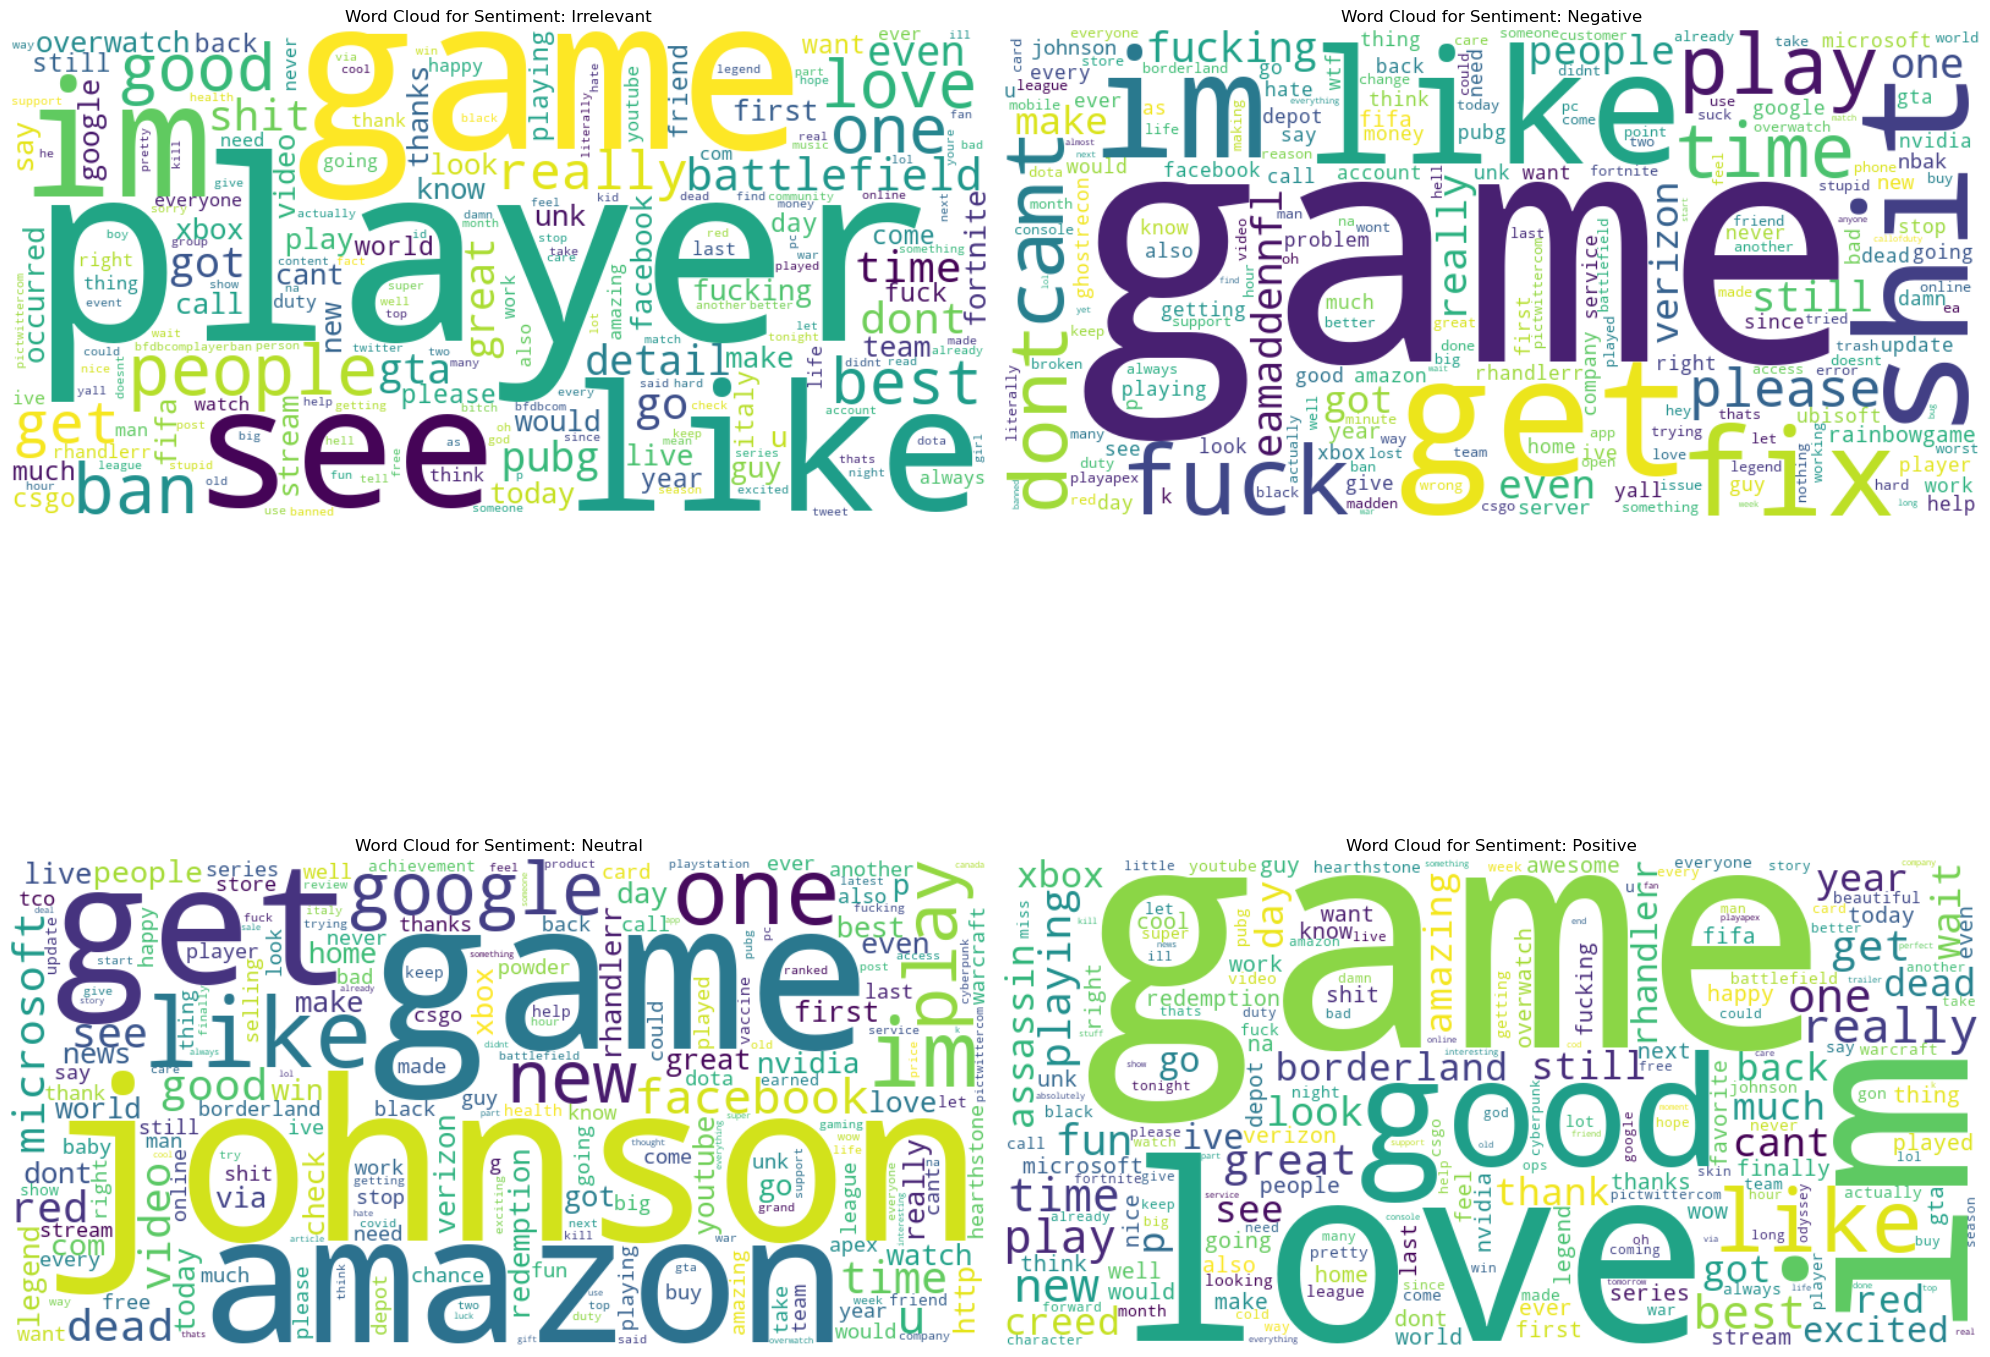

In [21]:
n_sentiments = len(word_freq)
cols = 2  
rows = (n_sentiments + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(20, 10 * rows))  

for i, (sentiment, freq) in enumerate(word_freq.items()):
    ax = axes[i // cols, i % cols] 
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for Sentiment: {sentiment.capitalize()}')
    
for j in range(i + 1, rows * cols):
    axes[j // cols, j % cols].axis('off')

plt.tight_layout()
plt.show()

### Most common words

In [22]:
full_data = pd.concat([train, test])

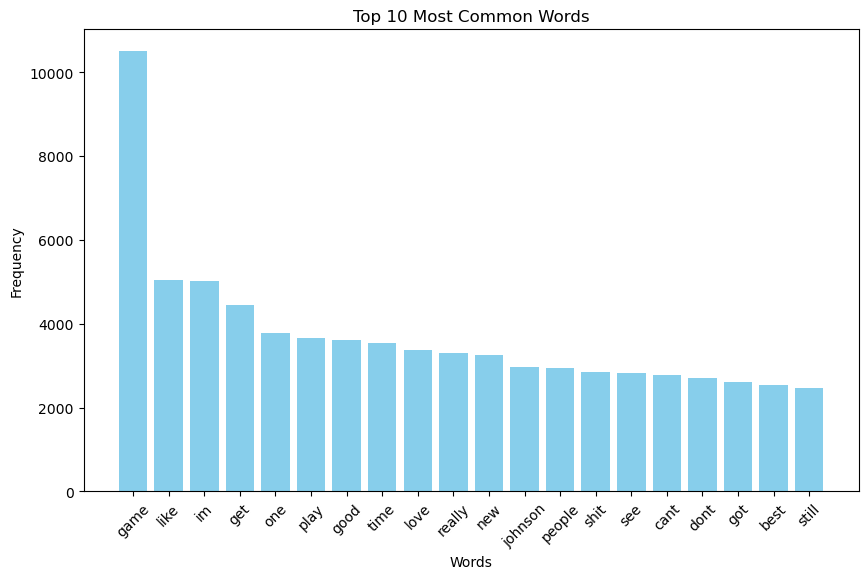

In [23]:
all_tokens = [token for sublist in full_data['content'] for token in sublist]
token_counts = Counter(all_tokens)

most_common_words = token_counts.most_common(20)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()


### Jaccard similarity score

In [24]:
train['original_text'] = org_train['content'] 
test['original_text'] = org_test['content']

In [25]:
train['original_length'] = train['original_text'].apply(len)
train['cleaned_length'] = train['content'].apply(lambda x: len(' '.join(x)))

test['original_length'] = test['original_text'].apply(len)
test['cleaned_length'] = test['content'].apply(lambda x: len(' '.join(x)))

In [26]:
def jaccard_similarity_by_count(list1, list2):
    if not list1 and not list2:  
        return 1
    if not list1 or not list2:  
        return 0
    count1 = Counter(list1)
    count2 = Counter(list2)
    intersection = sum((count1 & count2).values())
    union = sum((count1 | count2).values())
    return intersection / union

In [27]:
train['jaccard_score'] = train.apply(lambda row: jaccard_similarity_by_count(row['original_text'].split(), row['content']), axis=1)
test['jaccard_score'] = test.apply(lambda row: jaccard_similarity_by_count(row['original_text'].split(), row['content']), axis=1)

In [28]:
train['jaccard_score'].describe()

count    73995.000000
mean         0.212883
std          0.151336
min          0.000000
25%          0.111111
50%          0.206897
75%          0.297297
max          1.000000
Name: jaccard_score, dtype: float64

In [29]:
zero_jaccard_df = train[train['jaccard_score'] == 0]
zero_jaccard_df.head()

,sentiment,content,original_text,original_length,cleaned_length,jaccard_score
10,Positive,[],was,3,0,0.0
11,Neutral,"[rockhard, la, varlope, rare, powerful, handso...","Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",94,79,0.0
12,Neutral,"[rockhard, la, varlope, rare, powerful, handso...","Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",94,80,0.0
13,Neutral,"[rockhard, la, varlope, rare, powerful, handso...","Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",93,79,0.0
14,Neutral,"[rockhard, la, vita, rare, powerful, handsome,...","Rock-Hard La Vita, RARE BUT POWERFUL, HANDSOME...",91,76,0.0


### Modelling

In [30]:
train_filtered = train[train['sentiment'].isin(['Positive', 'Negative'])]
test_filtered = test[test['sentiment'].isin(['Positive', 'Negative'])]

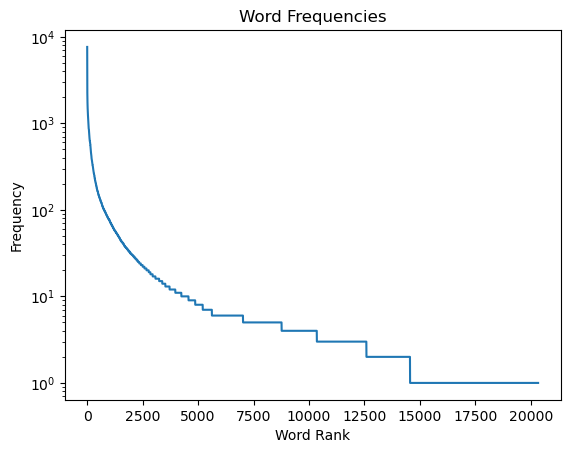

In [31]:
all_tokens = [token for sublist in train_filtered['content'] for token in sublist]
word_freq = Counter(all_tokens)

frequencies = list(word_freq.values())
frequencies.sort(reverse=True)

plt.plot(frequencies)
plt.title('Word Frequencies')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
plt.yscale('log')  
plt.show()

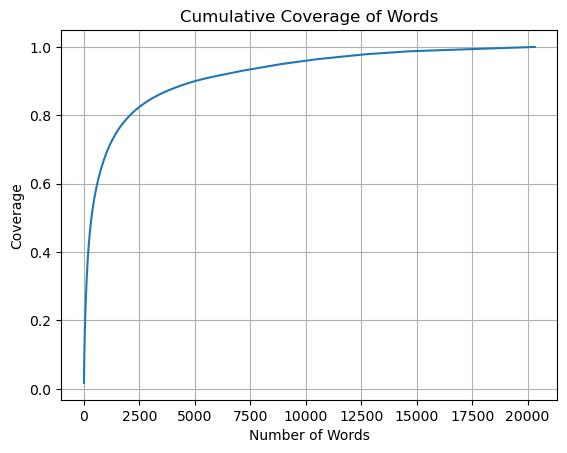

Coverage with top 1000 words: 68.77%
Coverage with top 5000 words: 89.98%
Coverage with top 7000 words: 92.88%
Coverage with top 10000 words: 95.98%
Coverage with top 15000 words: 98.80%
Coverage with top 20000 words: 99.93%


In [32]:
total_occurrences = sum(word_freq.values())
cumulative_counts = np.cumsum(sorted(word_freq.values(), reverse=True))
cumulative_coverage = cumulative_counts / total_occurrences

plt.plot(cumulative_coverage)
plt.title('Cumulative Coverage of Words')
plt.xlabel('Number of Words')
plt.ylabel('Coverage')
plt.grid(True)
plt.show()

for i in [1000, 5000, 7000, 10000, 15000, 20000]:
    coverage = cumulative_coverage[i] if i < len(cumulative_coverage) else cumulative_coverage[-1]
    print(f"Coverage with top {i} words: {coverage:.2%}")

In [37]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer

# Define vocabulary size
vocab_size = 7000

# Initialize the tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<UNK>')

# Combine the text content from both training and testing data
combined_content = pd.concat([train_filtered['content'], test_filtered['content']])

# Ensure all tokens are strings
all_text = combined_content.apply(lambda x: ' '.join(map(str, x)))

# Fit the tokenizer on the combined text content
tokenizer.fit_on_texts(all_text)

# Convert the text content in train and test datasets to sequences
train_filtered['content'] = train_filtered['content'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(map(str, x))])[0])
test_filtered['content'] = test_filtered['content'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(map(str, x))])[0])

print("First few rows of train_filtered with tokenized content:")
print(train_filtered.head())

print("First few rows of test_filtered with tokenized content:")
print(test_filtered.head())


First few rows of train_filtered with tokenized content:
  sentiment             content  \
0  Positive    [264, 1818, 237]   
1  Positive    [4, 70, 51, 237]   
2  Positive  [4, 264, 51, 1263]   
3  Positive   [4, 70, 51, 1263]   
4  Positive   [4, 70, 51, 1263]   

                                       original_text  original_length  \
0  I am coming to the borders and I will kill you...               51   
1  im getting on borderlands and i will kill you ...               50   
2  im coming on borderlands and i will murder you...               51   
3  im getting on borderlands 2 and i will murder ...               57   
4  im getting into borderlands and i can murder y...               53   

   cleaned_length  jaccard_score  
0              18       0.153846  
1              26       0.272727  
2              27       0.272727  
3              28       0.230769  
4              28       0.272727  
First few rows of test_filtered with tokenized content:
  sentiment                

C:\Users\JAMMITHRI\AppData\Local\Temp\ipykernel_30952\4122979193.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_filtered['content'] = train_filtered['content'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(map(str, x))])[0])
C:\Users\JAMMITHRI\AppData\Local\Temp\ipykernel_30952\4122979193.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filtered['content'] = test_filtered['content'].apply(lambda x: tokenizer.texts_to_sequences([' '.join(map(str, x))])[0])


In [38]:
vectorized_train = train_filtered.copy()
vectorized_test = test_filtered.copy()

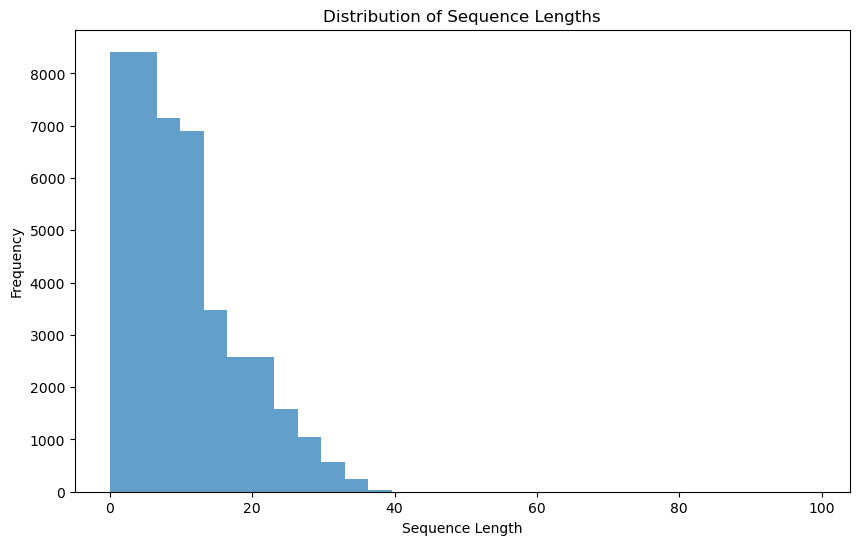

Mean length:  10.309681019250442
Median length:  8.0
Max length:  99
Min length:  0


In [39]:
lengths = [len(v) for v in vectorized_train['content']]

plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=30, alpha=0.7)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()

import numpy as np

print("Mean length: ", np.mean(lengths))
print("Median length: ", np.median(lengths))
print("Max length: ", np.max(lengths))
print("Min length: ", np.min(lengths))

In [40]:
max_length = int(np.percentile(lengths, 95))
print("95th percentile length: ", max_length)

95th percentile length:  26


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import ast

In [42]:
vectorized_train['content'] = vectorized_train['content'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
vectorized_test['content'] = vectorized_test['content'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [43]:
vectorized_train = vectorized_train[vectorized_train['content'].apply(len) > 0]
vectorized_train.reset_index(drop=True, inplace=True)

vectorized_test = vectorized_test[vectorized_test['content'].apply(len) > 0]
vectorized_test.reset_index(drop=True, inplace=True)

In [44]:
X = pad_sequences(vectorized_train['content'], maxlen=max_length, padding='post', dtype='float32')
X_test2 = pad_sequences(vectorized_test['content'], maxlen=max_length, padding='post', dtype='float32')

In [45]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(vectorized_train['sentiment']) 
y_test2 = label_encoder.fit_transform(vectorized_test['sentiment']) 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
vocab_size = 7000
embedding_dim = 50  
max_length = 26   

In [49]:
!pip install optuna


   ---------------------------------------- 0.0/380.1 kB ? eta -:--:--
   - -------------------------------------- 10.2/380.1 kB ? eta -:--:--
   ----------- ---------------------------- 112.6/380.1 kB 1.3 MB/s eta 0:00:01
   --------------- ------------------------ 143.4/380.1 kB 1.2 MB/s eta 0:00:01
   --------------- ------------------------ 143.4/380.1 kB 1.2 MB/s eta 0:00:01
   -------------------------- ------------- 256.0/380.1 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 256.0/380.1 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 368.6/380.1 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 368.6/380.1 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 368.6/380.1 kB 1.1 MB/s eta 0:00:01
   -------------------------------------  378.9/380.1 kB 813.8 kB/s eta 0:00:01
   -------------------------------------- 380.1/380.1 kB 739.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/233.4 kB 

In [50]:
import optuna
def objective(trial):
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_neurons = trial.suggest_int('num_neurons', 16, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    regularization_rate = trial.suggest_float('regularization_rate', 0.001, 0.01)
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    for i in range(num_layers):
        model.add(Bidirectional(LSTM(num_neurons, return_sequences=(i < num_layers-1))))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        min_delta=0.001,
        mode='min',
        verbose=1,
        restore_best_weights=True
    )
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=10,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
         )
    return min(history.history['val_loss'])
    

In [51]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1)

print('Best trial:')
best_trial = study.best_trial
print('  Value: {:.6f}'.format(best_trial.value))
print('  Params: ')
for key, value in best_trial.params.items():
    print('    {}: {}'.format(key, value))

[I 2024-05-16 13:16:47,837] A new study created in memory with name: no-name-21726b6d-255f-44d5-be2a-4428da68efd6


Epoch 1/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 90s 76ms/step - accuracy: 0.7406 - loss: 0.4872 - val_accuracy: 0.8841 - val_loss: 0.2804
Epoch 2/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 67s 73ms/step - accuracy: 0.9162 - loss: 0.2124 - val_accuracy: 0.9164 - val_loss: 0.2109
Epoch 3/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 65s 71ms/step - accuracy: 0.9463 - loss: 0.1405 - val_accuracy: 0.9250 - val_loss: 0.1967
Epoch 4/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.9601 - loss: 0.1054 - val_accuracy: 0.9302 - val_loss: 0.1919
Epoch 5/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 66s 72ms/step - accuracy: 0.9689 - loss: 0.0834 - val_accuracy: 0.9340 - val_loss: 0.1879
Epoch 6/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 62s 67ms/step - accuracy: 0.9715 - loss: 0.0708 - val_accuracy: 0.9283 - val_loss: 0.2132
Epoch 7/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 73s 79ms/step - accuracy: 0.9736 - loss: 0.0639 - val_accuracy: 0.9321 - val_loss: 0.2372
Epoch 8/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 65s 70ms/step - accuracy: 0.9784 - loss: 0.0532 - 

[I 2024-05-16 13:26:05,045] Trial 0 finished with value: 0.18787959218025208 and parameters: {'num_layers': 3, 'num_neurons': 68, 'dropout_rate': 0.3602949724615808, 'regularization_rate': 0.00371410639490431}. Best is trial 0 with value: 0.18787959218025208.


Best trial:
  Value: 0.187880
  Params: 
    num_layers: 3
    num_neurons: 68
    dropout_rate: 0.3602949724615808
    regularization_rate: 0.00371410639490431


In [52]:
num_layers = 2
num_neurons = 124
dropout_rate = 0.23113088976644125
regularization_rate = 0.005990606683251042

In [53]:
def build_model(num_layers, num_neurons, dropout_rate, regularization_rate):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
    for i in range(num_layers):
        model.add(Bidirectional(LSTM(num_neurons, return_sequences=(i < num_layers - 1))))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [54]:
model = build_model(num_layers, num_neurons, dropout_rate, regularization_rate)

In [55]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=0.001,
    mode='min',
    verbose=1,
    restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 84s 74ms/step - accuracy: 0.7561 - loss: 0.4706 - val_accuracy: 0.8926 - val_loss: 0.2884
Epoch 2/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 69s 75ms/step - accuracy: 0.9173 - loss: 0.2109 - val_accuracy: 0.9166 - val_loss: 0.2182
Epoch 3/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 73s 79ms/step - accuracy: 0.9455 - loss: 0.1450 - val_accuracy: 0.8954 - val_loss: 0.2815
Epoch 4/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 65s 71ms/step - accuracy: 0.9606 - loss: 0.1017 - val_accuracy: 0.9197 - val_loss: 0.2204
Epoch 5/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 65s 70ms/step - accuracy: 0.9656 - loss: 0.0816 - val_accuracy: 0.9323 - val_loss: 0.2024
Epoch 6/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 7648s 8s/step - accuracy: 0.9728 - loss: 0.0683 - val_accuracy: 0.9307 - val_loss: 0.2199
Epoch 7/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 70s 76ms/step - accuracy: 0.9751 - loss: 0.0568 - val_accuracy: 0.9306 - val_loss: 0.2117
Epoch 8/10
921/921 ━━━━━━━━━━━━━━━━━━━━ 55s 60ms/step - accuracy: 0.9801 - loss: 0.0467 - 

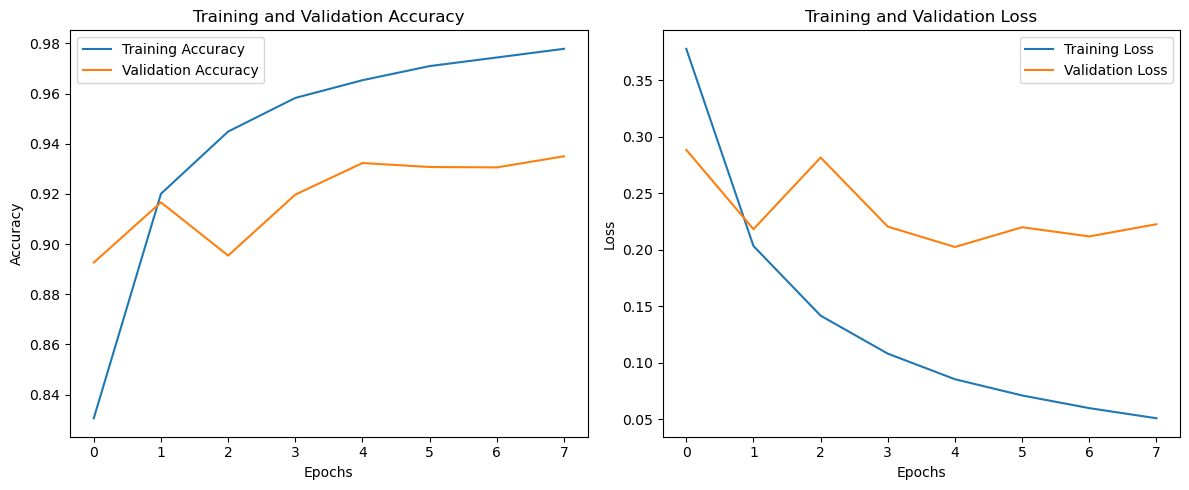

In [56]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Testing the trained model on a different test set

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

predictions_proba = model.predict(X_test2)
predictions = (predictions_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test2, predictions)
precision = precision_score(y_test2, predictions)
recall = recall_score(y_test2, predictions)
f1 = f1_score(y_test2, predictions)
conf_matrix = confusion_matrix(y_test2, predictions)
auc = roc_auc_score(y_test2, predictions_proba)  

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step
Accuracy: 97.42%
Precision: 0.98
Recall: 0.97
F1 Score: 0.97


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


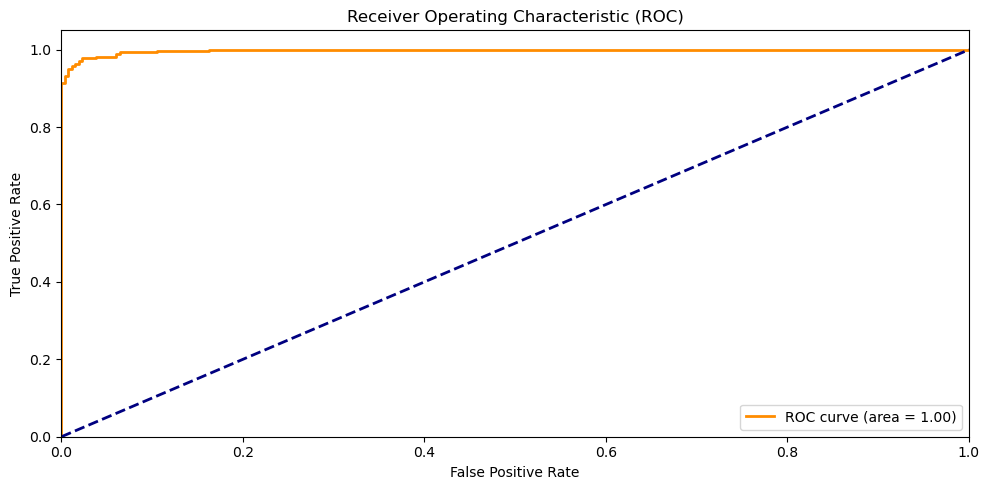

In [58]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions_proba = model.predict(X_test2)
predictions = (predictions_proba > 0.5).astype(int)

fpr, tpr, thresholds = roc_curve(y_test2, predictions_proba)
roc_auc = auc(fpr, tpr)

conf_matrix = confusion_matrix(y_test2, predictions)

plt.figure(figsize=(10, 5))

plt.subplot(1, 1, 1)  
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()